### 1.How many tennis players are included in the dataset?

In [17]:
import pandas as pd

away_path = r"G:\learning\daneshkar\statistic and data analis\project\project_to_git\Data-Science-Project\data\proccessed_data\raw_match\away_team_all_days.parquet"
home_path = r"G:\learning\daneshkar\statistic and data analis\project\project_to_git\Data-Science-Project\data\proccessed_data\raw_match\home_team_all_days.parquet"
away_df = pd.read_parquet(away_path)
home_df = pd.read_parquet(home_path)

# away_new = away_df[["match_id","full_name"]]
# home_new = home_df[["match_id","full_name"]]

In [18]:
home_player = home_df["full_name"].unique()
away_player = away_df["full_name"].unique()

all_players  = pd.Series(pd.concat([pd.Series(home_player),pd.Series(away_player)])).unique()
total_players = len(all_players)
common_players = len(set(home_player) & set(away_player))

In [19]:
print(f"all players in dataset is : {total_players}")
print(f"all commen player beetween home and away is {common_players}")
print(f"all players in home_team is : {len(home_player)}")
print(f"all players in away_team is : {len(away_player)}")

all players in dataset is : 2652
all commen player beetween home and away is 2284
all players in home_team is : 2452
all players in away_team is : 2484


### 2.What is the average height of the players?

In [20]:
import pandas as pd 
away_path = r"G:\learning\daneshkar\statistic and data analis\project\project_to_git\Data-Science-Project\data\proccessed_data\raw_match\away_team_all_days.parquet"
home_path = r"G:\learning\daneshkar\statistic and data analis\project\project_to_git\Data-Science-Project\data\proccessed_data\raw_match\home_team_all_days.parquet"
away_df = pd.read_parquet(away_path)
home_df = pd.read_parquet(home_path)

away_player = away_df[["full_name","height"]]
home_player = home_df[["full_name","height"]]

In [21]:
all_data = pd.concat([away_player,home_player])


player_avrage = all_data.groupby("full_name")["height"].mean()
final_avrage = player_avrage.mean()
total_players = len(player_avrage)

In [22]:
print(f"the avrage of heights of players in dataset is {final_avrage}")
print(f"total players for calculate avrage is : {total_players}")

the avrage of heights of players in dataset is 1.8217391303456676
total players for calculate avrage is : 2651


### 3.Which player has the highest number of wins?

In [27]:
import pandas as pd 
away_path = r"G:\learning\daneshkar\statistic and data analis\project\project_to_git\Data-Science-Project\data\proccessed_data\raw_match\away_team_all_days.parquet"
home_path = r"G:\learning\daneshkar\statistic and data analis\project\project_to_git\Data-Science-Project\data\proccessed_data\raw_match\home_team_all_days.parquet"
odds_path = r"G:\learning\daneshkar\statistic and data analis\project\project_to_git\Data-Science-Project\data\proccessed_data\raw_odds_parquet_all_days.parquet"

away_df = pd.read_parquet(away_path)
home_df = pd.read_parquet(home_path)
odds_df = pd.read_parquet(odds_path)


away_player = away_df[["match_id","full_name"]]
home_player = home_df[["match_id","full_name"]]
odds_winning = odds_df[["match_id","winnig"]]

In [28]:
all_players = pd.concat([home_player,away_player],ignore_index=True)
merged_df = pd.merge(all_players,odds_winning,on="match_id")



wins_df = merged_df[merged_df["winnig"] == 1]
wins_df2 = wins_df.drop_duplicates(subset=["match_id"])
wins_count = wins_df2["full_name"].value_counts().head(10)
print(f"top ten players with most wins is : {wins_count}")

top ten players with most wins is : full_name
Jianu, Filip Cristian                21
Sakellaridi, Sapfo                   20
Kužmová, Katarína                    18
Swiatek, Iga                         18
Dellien Velasco, Murkel Alejandro    16
Basilashvili, Nikoloz                16
Albot, Radu                          15
Bolt, Alex                           15
Gengel, Marek                        15
Pigossi, Laura                       14
Name: count, dtype: int64


In [29]:
print(f"player full name with most wins is {wins_count.index[0]} with {wins_count.iloc[0]} wins")

player full name with most wins is Jianu, Filip Cristian with 21 wins


Text(0, 0.5, 'wins')

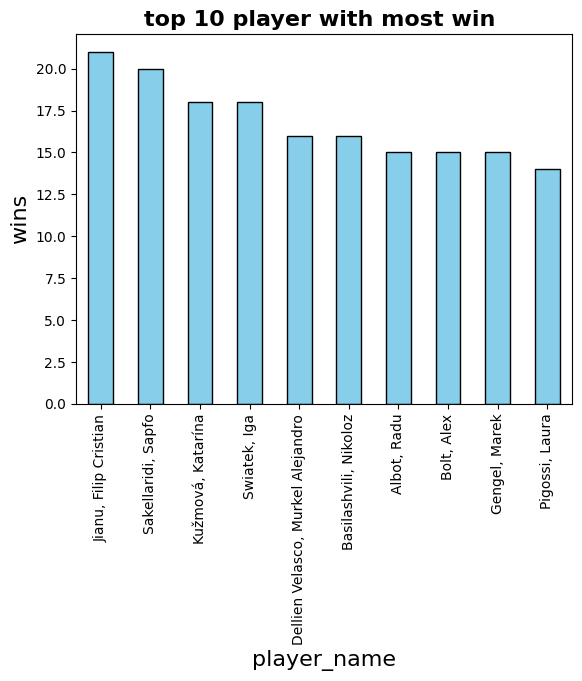

In [30]:
import matplotlib.pyplot as plt
top_10_player = wins_count.head(10)

plt.figure()
top_10_player.plot(kind="bar",color="skyblue",edgecolor="black")

plt.title("top 10 player with most win ",fontsize=16,fontweight = "bold")
plt.xlabel("player_name", fontsize=16)
plt.ylabel("wins",fontsize=16)